## Happiness Score from the [World Happiness Report](https://worldhappiness.report/)
In this notebook we will use the 2023 "World Happiness Report" dataset. This dataset is based on the yearly Gallup World Poll which surveys around 100,000 people from 130 countries. The main metric is the Cantril ladder which asks respondents to think of a ladder and their standing on it with the best possible life for them being a 10 and the worst possible life being a 0. We select the five countries with the highest variance across the years 2008 to 2022 with respect to the Cantrill Ladder Score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


from tueplots import bundles
import tueplots
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)
# Plug any of those into either the rcParams or into an rc_context:
plt.rcParams.update(bundles.icml2022())
with plt.rc_context(bundles.icml2022()):
    pass

The data website is linked [here](https://worldhappiness.report/data/). We use the latest information from 2023 under the name ["Data for Table 2.1"](https://happiness-report.s3.amazonaws.com/2023/DataForTable2.1WHR2023.xls). It contains the ladder score from 2005 to 2021. But for most countries since 2006 and for Germany there is a pause that year so we start from 2007.

In [2]:
df = pd.read_csv('../dat/DataForTable2.1WHR2023.csv')
df = df[df['year'] >= 2007]

In [3]:
# We extract a list of countries as these don't have information for every year so we need to query them individually
# We select countries which have at least 9 points, that is at least half or more information from 2005 to 2022.
all_countries = np.array(list(set(df["Country name"])))
countries = []
for country in all_countries:
    datapoints = df[df['Country name'] == country]['Life Ladder']
    if len(datapoints) >=9:
        countries.append(country)

stds = []
for country in countries:
    std = df[df['Country name'] == country]['Life Ladder'].std(axis=0)
    stds.append(std)
stds, countries = np.array(stds), np.array(countries)

In [4]:
# Some countries only have data for one year, and their std is a nan value. We remove these from both the countries and stds list.
countries = countries[(stds==stds)]
stds = stds[(stds==stds)]
sorted_variance = np.argsort(stds)[::-1]

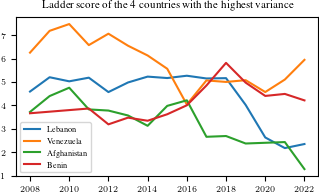

In [5]:
# We make plots of the estimated share of people in the countries with the highest variance in time for the corresponding illness
num_countries = 4
for i in range(num_countries):
    country = countries[sorted_variance[i]]
    
    # Group by 'Entity' (country) and calculate the mean percentage for each disorder
    ladder_score = df[df['Country name'] == country]['Life Ladder']
    years = df[df['Country name'] == country]['year']
    plt.plot(years, ladder_score, label=country)
    plt.title('Ladder score of the '+str(num_countries)+' countries with the highest variance')
plt.xticks(range(2008,2023)[::2])
plt.legend()
plt.savefig("happinessScore_variance.pdf")

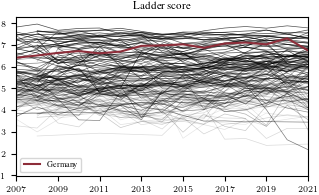

In [89]:
# We make plots of the estimated share of people in the countries with the highest variance in time for the corresponding illness
gdp = pd.read_csv("../dat/cleaned/GDP.csv")

for i in range(len(countries)):
    country = countries[i]
    
    # Group by 'Entity' (country) and calculate the mean percentage for each disorder
    ladder_score = df[df['Country name'] == country]['Life Ladder']
    years = df[df['Country name'] == country]['year']
    gdp2022 = np.nanmean((np.array(gdp[gdp['Unnamed: 0'] == country]))[0][1:])
    if (country=="Germany"):
        continue
    
    def alpha(gdp_value):
        slope_alpha=0.8/(gdp["2022"].max()-gdp["2022"].min())
        bias = 0.05 - slope_alpha*gdp["2022"].min()
        return slope_alpha*gdp_value + bias
    
    plt.plot(years, ladder_score, color = "k" , alpha=alpha(gdp2022), linewidth=0.5)

ladder_score = df[df['Country name'] == "Germany"]['Life Ladder']
years = df[df['Country name'] == "Germany"]['year']
plt.plot(years, ladder_score, color = rgb.tue_red, label="Germany")
plt.legend()

plt.title('Ladder score')
plt.xlim([2007,2021])
plt.xticks(range(2007,2022)[::2])
plt.savefig("happinessScore_germany.pdf")